# MNIST TIME

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

In [4]:
mnist = fetch_openml('mnist_784', version=1, as_frame = False, parser="auto")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
# Assigning the data to some variables
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

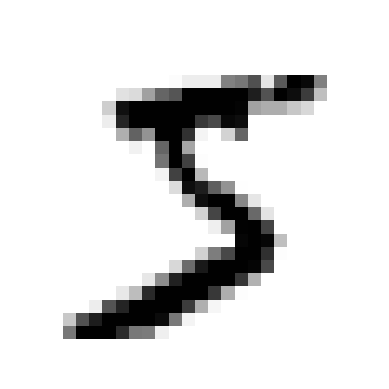

In [7]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [8]:
y[0]

'5'

In [9]:
# Turning all the labels from strings to ints
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [10]:
# slicing up the test train split, pre shuffled by sklearn

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
# Creating lists of bools for if a label is or is not five, this is for binary classification which is where this chapter
# wants to show us first

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [13]:
# Train up an SGD classifier

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:

sgd_clf.predict([some_digit])

array([ True])

In [15]:
# So to remember, cross val score returns the scores of the model and cross val predict returns a set of predictions
# i can use for other stuff.

cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [16]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

In [17]:
confusion_matrix(y_train_5, y_train_pred)

array([[53115,  1464],
       [  916,  4505]], dtype=int64)

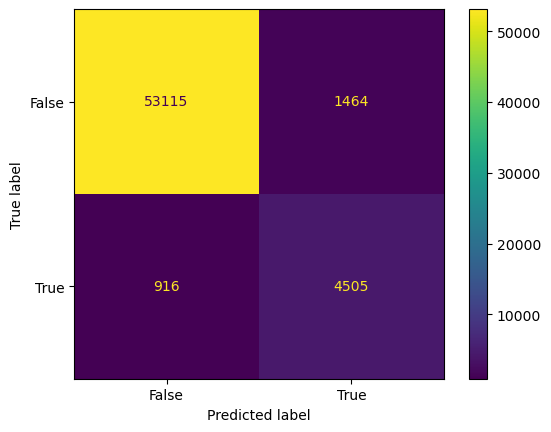

In [18]:
# Da giga way to look at the conf matrix
ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_pred)

In [19]:
precision_score(y_train_5, y_train_pred)

0.7547327860613168

In [20]:
recall_score(y_train_5, y_train_pred)

0.8310274857037447

In [21]:
f1_score(y_train_5, y_train_pred)

0.791044776119403

In [22]:
# In my opinion the better way to do this is like this

cross_val_score(sgd_clf, X_train, y_train_pred, cv=5, scoring="precision")

array([0.86630435, 0.82094082, 0.7248996 , 0.70333988, 0.86601942])

In [23]:
cross_val_score(sgd_clf, X_train, y_train_pred, cv=5, scoring="recall")

array([0.66750419, 0.90619765, 0.90703518, 0.89949749, 0.74769489])

In [24]:
cross_val_score(sgd_clf, X_train, y_train_pred, cv=5, scoring="f1_macro")

array([0.86513067, 0.92263494, 0.89065516, 0.88124385, 0.89118012])

In [25]:
# FUcking with the threshold for these scores, never did this before

y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [26]:
# set the threshold to 0 and predict against it.

threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [27]:
# now shift the threshold to be higher then the decision score

threshold = 3000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

In [28]:
# like butter

In [29]:
# The image is a 5 so increasing the threshold decreases the recall making the model more precise, do the opposite
# to catch more instances, this will obvs make the model less accurate but capture everytime some is correct...

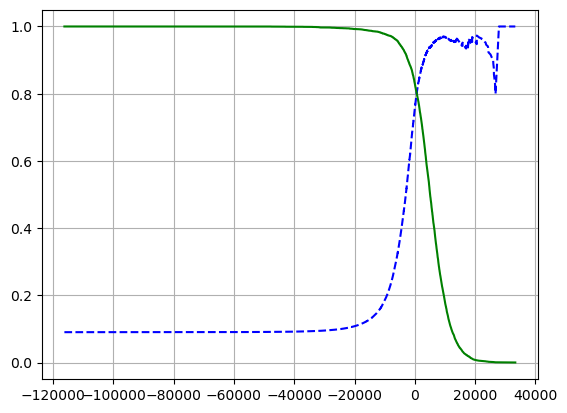

In [30]:
# Now we can do this in the way that i perfer to do it....

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5, method="decision_function") # didnt know you could do method with predict

# stealing the next thing as i havent does this before either

pre, rec, thres = precision_recall_curve(y_train_5, y_scores)

def plot_prvt(prec, rec, thres):
    plt.plot(thres, prec[:-1], "b--", label="Precision")
    plt.plot(thres, rec[:-1], "g-", label="Recall")
    plt.grid()

plot_prvt(pre, rec, thres)

In [31]:
# The book continues to just pump out coded functions for this curve and that curve, I rememeber doing ROC curves.... they kinda bore me
# I dont see i real good reason for them and I know im wrong on that statement but kinda until it becomes useful I find it hard to focus
# on learning them... silly I know.

In [32]:
# AUC is abit better as its a metric we can use
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9648211175804801

In [33]:
# Rando time

rnd_clf = RandomForestClassifier(random_state=42)
y_proba = cross_val_predict(rnd_clf, X_train, y_train, cv=5, method="predict_proba")

y_scores_forest = y_proba[:,1]

roc_auc_score(y_train_5, y_scores_forest)

0.47008119628884115

# Multiclass classificatio

In [34]:
from sklearn.svm import SVC

In [35]:
svm = SVC()
svm.fit(X_train, y_train)
svm.predict([some_digit])

array([5], dtype=uint8)

In [36]:
# The time its taking to load up all the cells so far to do multiclass is longer than me reading the whole section... im now on multilabel..
# Multiclass is simple enought

# Multilabel Classification

In [44]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_multilabel)

KNeighborsClassifier(n_jobs=-1)

In [45]:
knn.predict([some_digit])

array([[False,  True]])

In [47]:
cross_val_score(knn, X_train, y_train, cv=3, scoring="f1_macro", n_jobs=-1)

array([0.96743908, 0.96688195, 0.9673281 ])

In [52]:
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

In [53]:
knn.fit(X_train, y_multilabel)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [54]:
cross_val_score(knn, X_train, y_train, cv=3, scoring="f1_macro", n_jobs=-1)

array([0.96202477, 0.96178737, 0.96434512])